# Mushroom Classification

###### Problem Statement: We have to classify whether the mushroom is edible or poisonous based on various features. 

## Importing the Necessary Libraries

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
#Libraries for Encoding
from sklearn.preprocessing import LabelEncoder
#Libraries for importing train and test set data
from sklearn.model_selection import train_test_split
#Libraries for Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics
#Libraries for RoC
from sklearn.metrics import roc_curve, auc
#Libraries for Linear Discriminant Analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#Libraries for Quadratic Discriminant Analysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

## Loading the Dataset and Knowing the attributes present

In [2]:
#Reading the Data File
data=pd.read_csv("mushrooms.csv")
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
#Checking the number of rows and columns
data.shape

(8124, 23)

In [4]:
#Knowing about the Data set
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


## Data Preprocessing

### Checking whether any null variables are available

In [5]:
for col in data.columns:
    print("{} : {}".format(col, data[col].isnull().sum()))

class : 0
cap-shape : 0
cap-surface : 0
cap-color : 0
bruises : 0
odor : 0
gill-attachment : 0
gill-spacing : 0
gill-size : 0
gill-color : 0
stalk-shape : 0
stalk-root : 0
stalk-surface-above-ring : 0
stalk-surface-below-ring : 0
stalk-color-above-ring : 0
stalk-color-below-ring : 0
veil-type : 0
veil-color : 0
ring-number : 0
ring-type : 0
spore-print-color : 0
population : 0
habitat : 0


### Finding the Unique Variables in Class

In [6]:
data['class'].unique()

array(['p', 'e'], dtype=object)

###### Thus we have two variables known as poisonous or edible. With this we are going to classify the mushroom. 

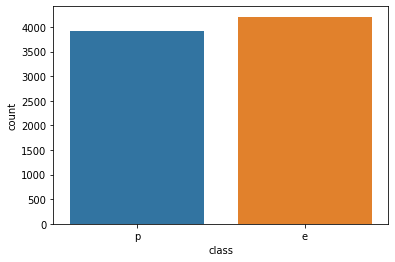

In [7]:
#Plotting the count of the class
x = data['class']

ax = sns.countplot(x=x, data=data)

### Label Encoding

In [8]:
#Normalising the labels and Transfering the non numerical labels into numerical labels
le = LabelEncoder()
data['class'] = le.fit_transform(data['class'])

data.head() #Displaying the data after encoding

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,0,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,0,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,1,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,0,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


#### Checking the encoded values

In [9]:
data['stalk-color-above-ring'].unique() #Taking an attribute to check
print(data.groupby('class').size())  

class
0    4208
1    3916
dtype: int64


#### Getting Dummies of the dataset

In [10]:
encoded_data = pd.get_dummies(data)

encoded_data.head(5)

,class,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,0,0,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0


## EDA

### Univariate Analysis

#### Plotting the Graphs

In [11]:
def plot_data(hue, data):
    for i, col in enumerate(data.columns):
        plt.figure(i)
        sns.set(rc={'figure.figsize':(11.7,8.27)})
        ax = sns.countplot(x=data[col], hue=hue, data=data)

c:\python 3.7\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


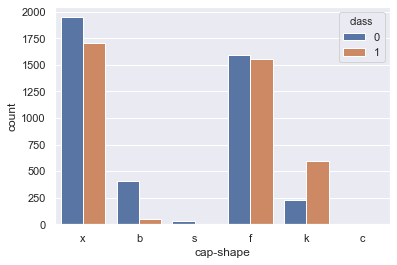

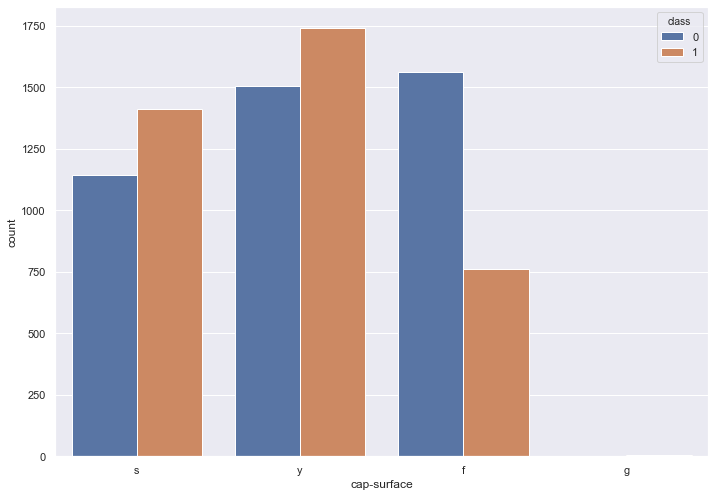

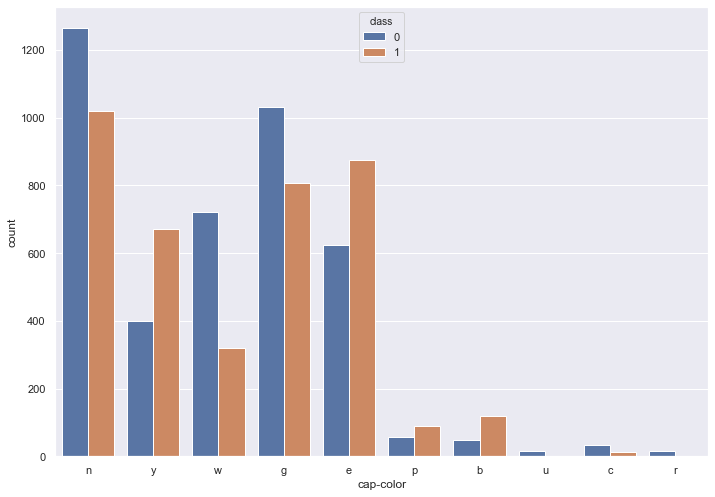

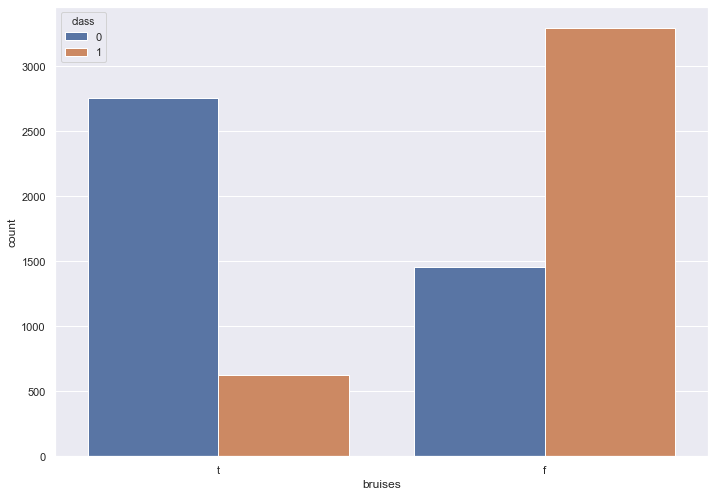

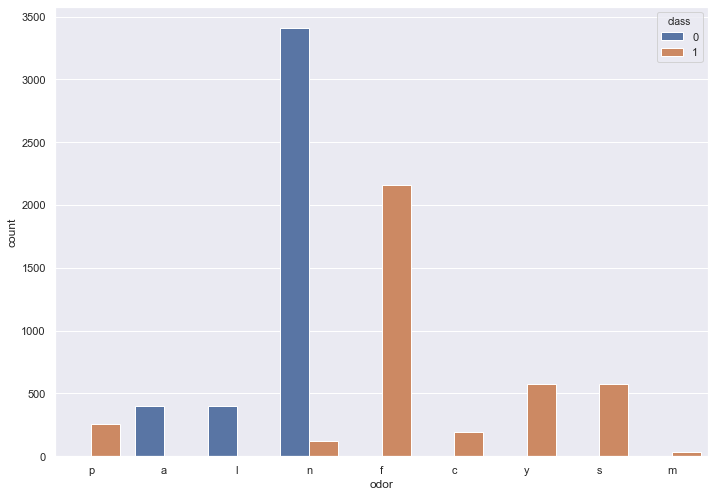

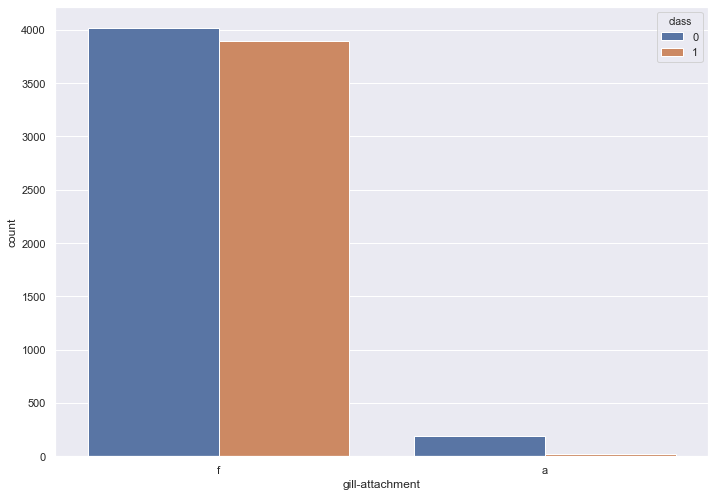

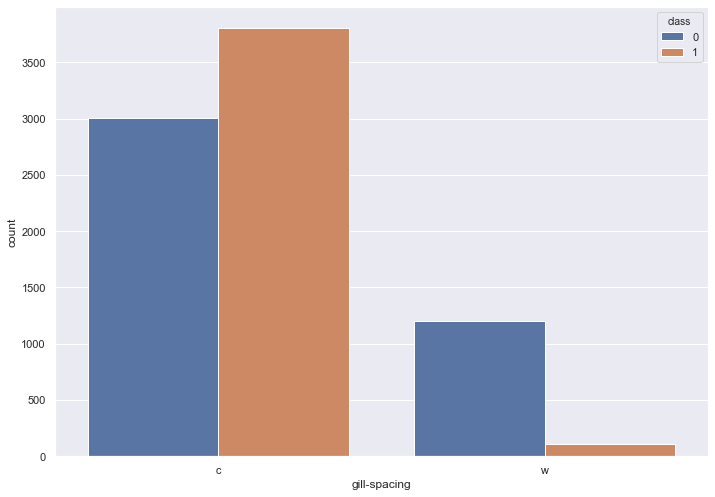

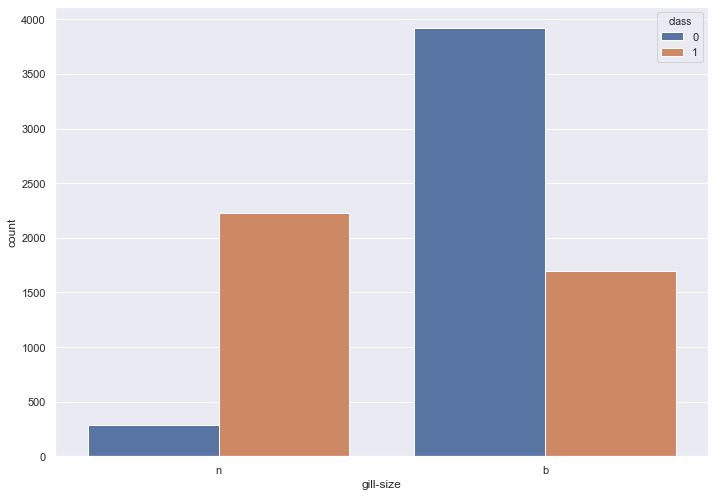

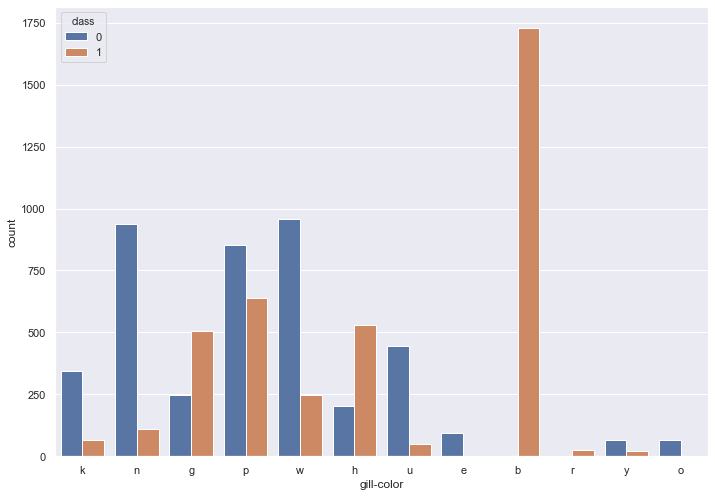

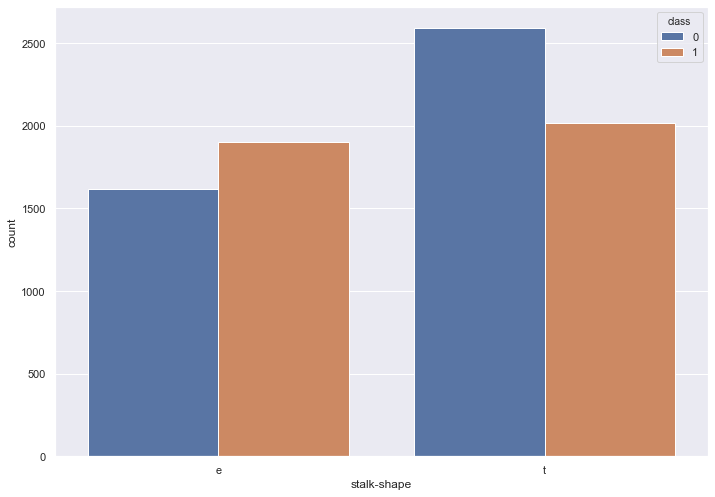

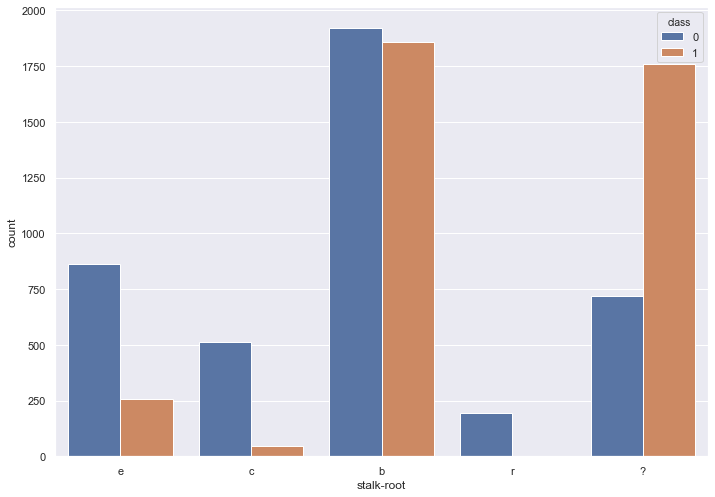

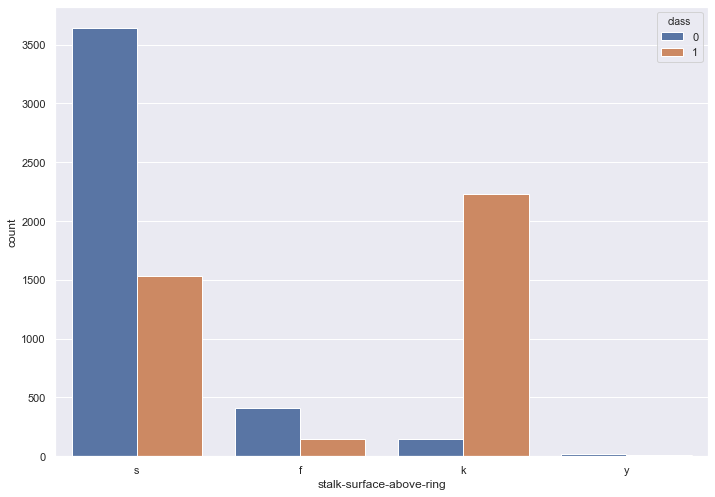

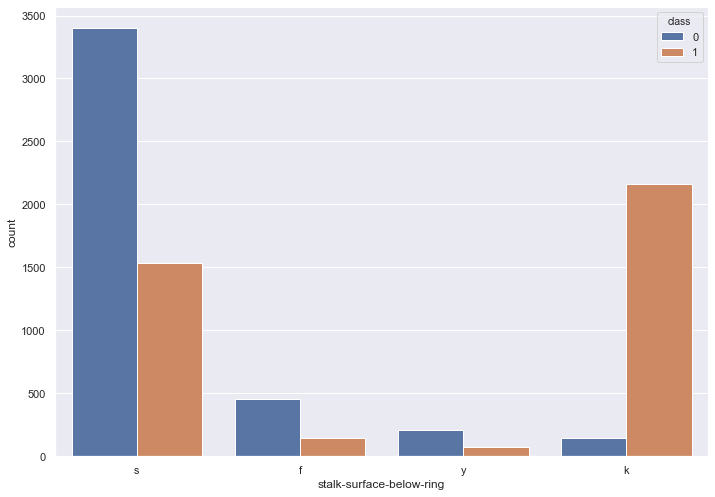

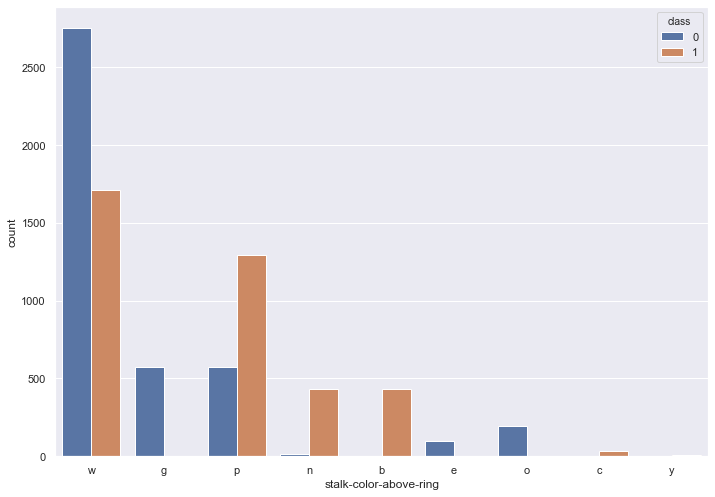

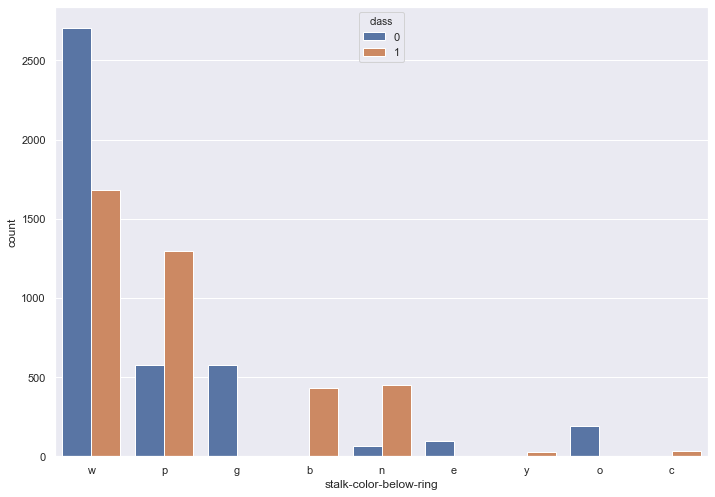

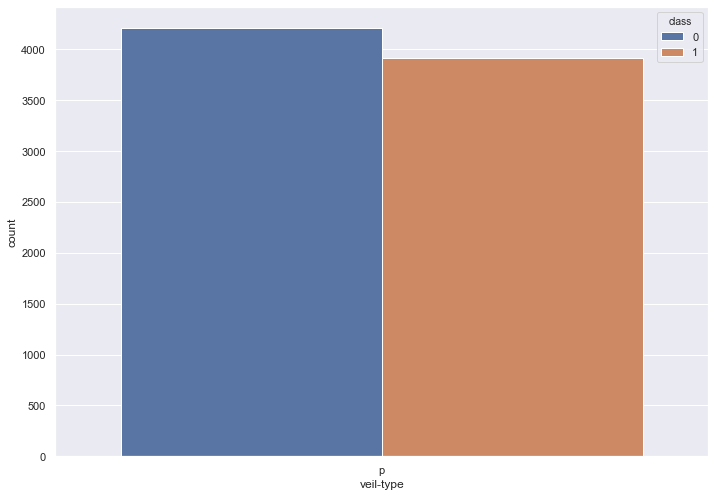

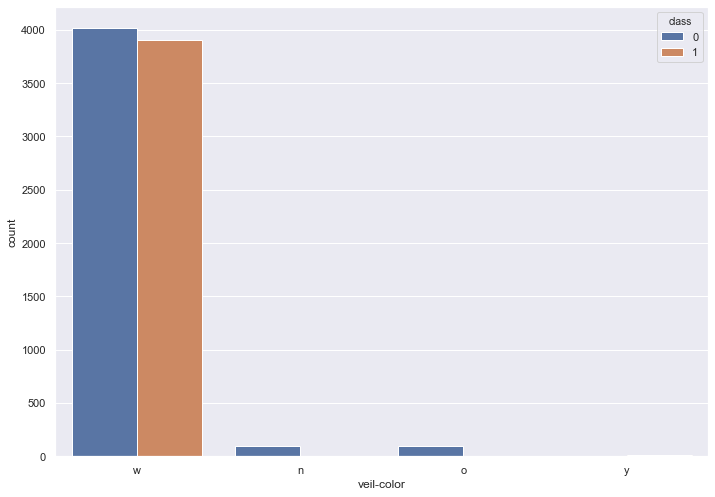

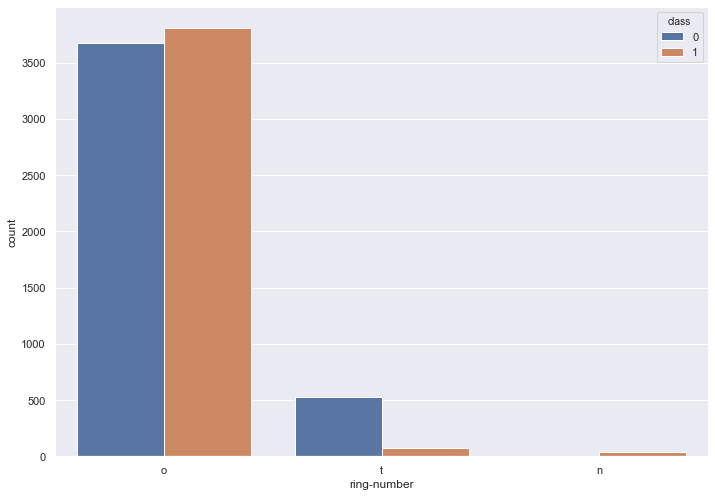

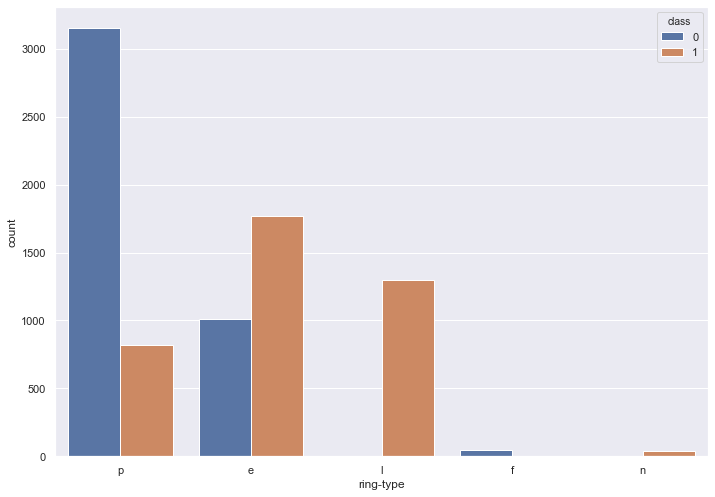

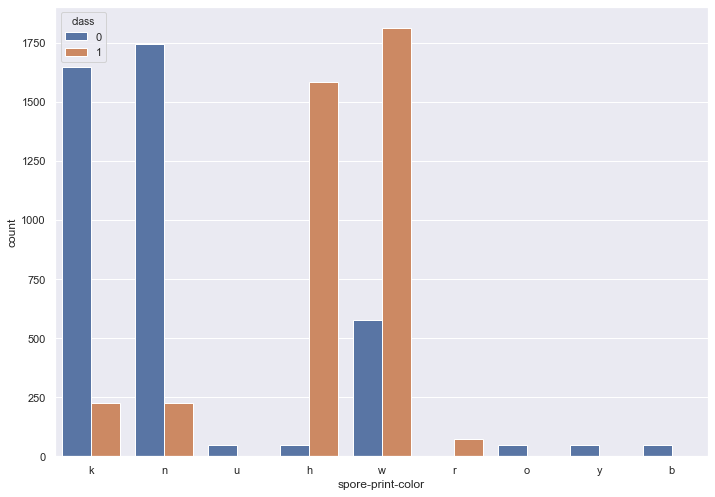

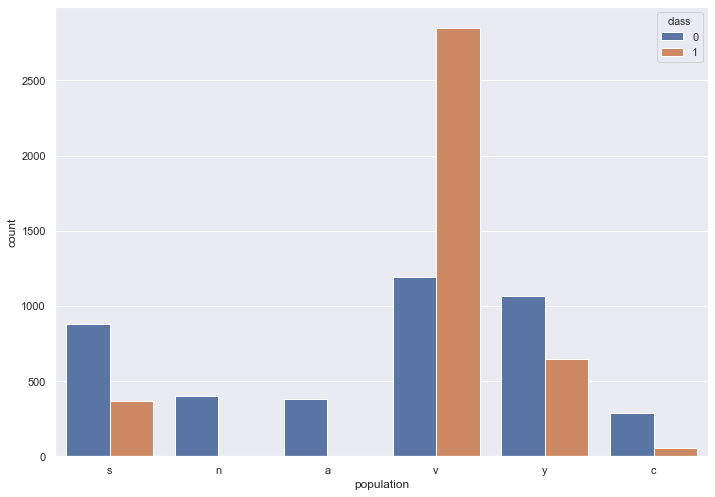

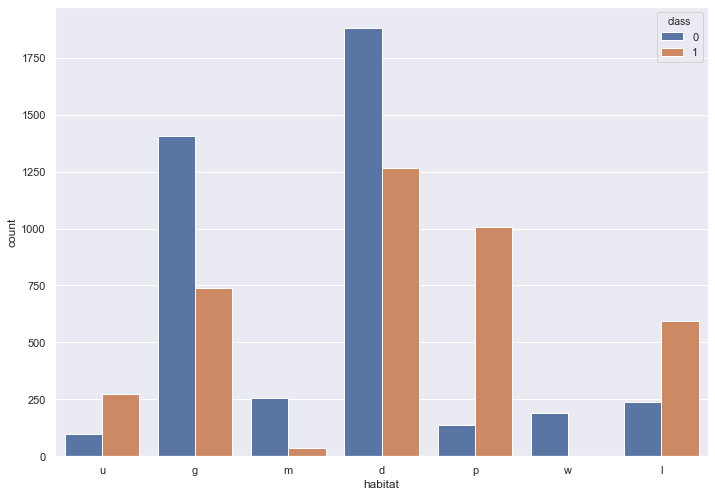

In [12]:
hue = data['class']
data_for_plot = data.drop('class', 1)

plot_data(hue, data_for_plot)

## Modelling

In [13]:
y = data['class'].values.reshape(-1, 1)
X = encoded_data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Logistic Regression

#### Getting Dummies of the dataset

In [14]:
logistc_reg = LogisticRegression()
logistc_reg.fit(X_train, y_train.ravel())

c:\python 3.7\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

#### Determining the Probability

In [15]:
y_prob = logistc_reg.predict_proba(X_test)[:,1]
y_pred = np.where(y_prob > 0.5, 1, 0)

In [16]:
print(y_prob,y_pred)

[1.79091749e-04 9.99083241e-01 9.99793130e-01 ... 9.99917257e-01
 9.99208998e-01 9.98646557e-01] [0 1 1 ... 1 1 1]


#### Confusion Matrix

In [17]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)

confusion_matrix

array([[843,   0],
       [  0, 782]], dtype=int64)

#### Correlation Matrix

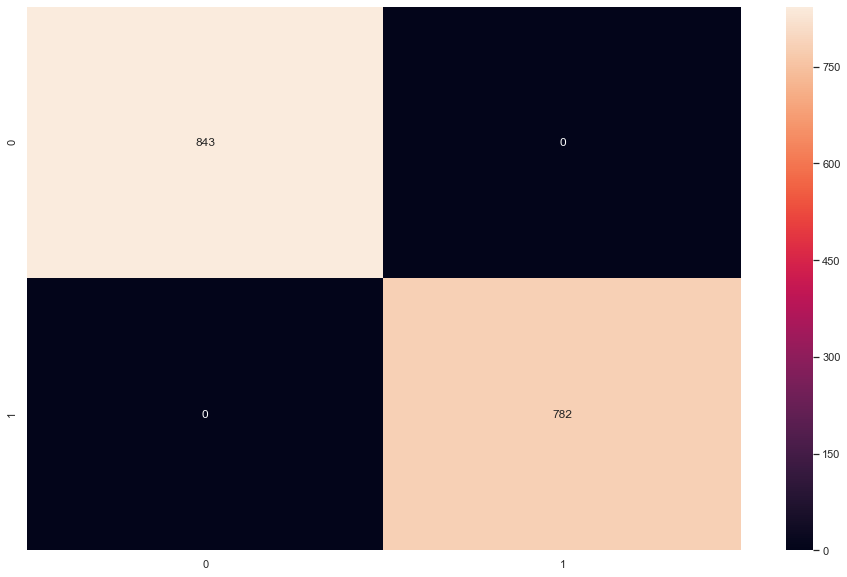

In [18]:
plt.figure(figsize=(16,10))
sns.heatmap(confusion_matrix,annot=True,fmt='.0f')
plt.show()

#### Finding out the roc_auc_score with y_pred

In [19]:
auc_roc=metrics.roc_auc_score(y_test,y_pred)
auc_roc

1.0

#### Finding out the roc_auc_score with y_prob

In [20]:

from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

1.0

#### Plotting the roc curve

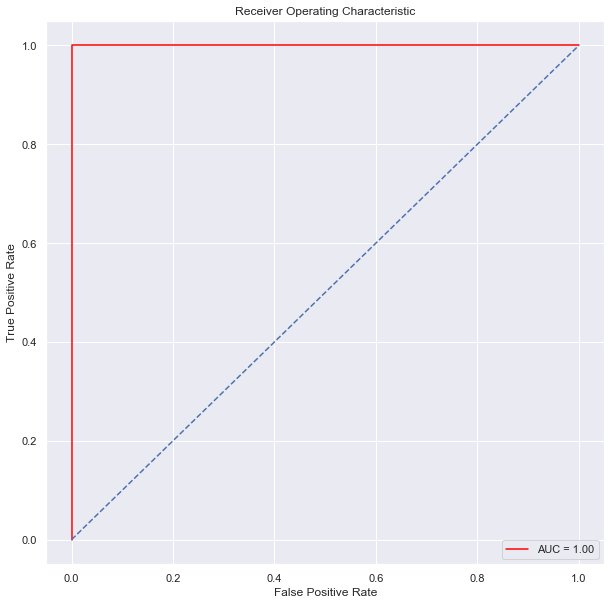

In [21]:
#Plotting Roc Curve
def plot_roc(roc_auc):
    plt.figure(figsize=(10,10))
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],linestyle='--')
    plt.axis('tight')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    
plot_roc(roc_auc)

### LDA

#### Fitting the Data

In [22]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train.ravel())

c:\python 3.7\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

#### Determining Probability

In [23]:
y_prob_lda = lda.predict_proba(X_test)[:,1]
y_pred_lda = np.where(y_prob > 0.5, 1, 0)
print(y_prob_lda,y_pred_lda)

[0. 1. 1. ... 1. 1. 1.] [0 1 1 ... 1 1 1]


#### Confusion Matrix

In [24]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred_lda)

confusion_matrix

array([[843,   0],
       [  0, 782]], dtype=int64)

#### Correlation Matrix

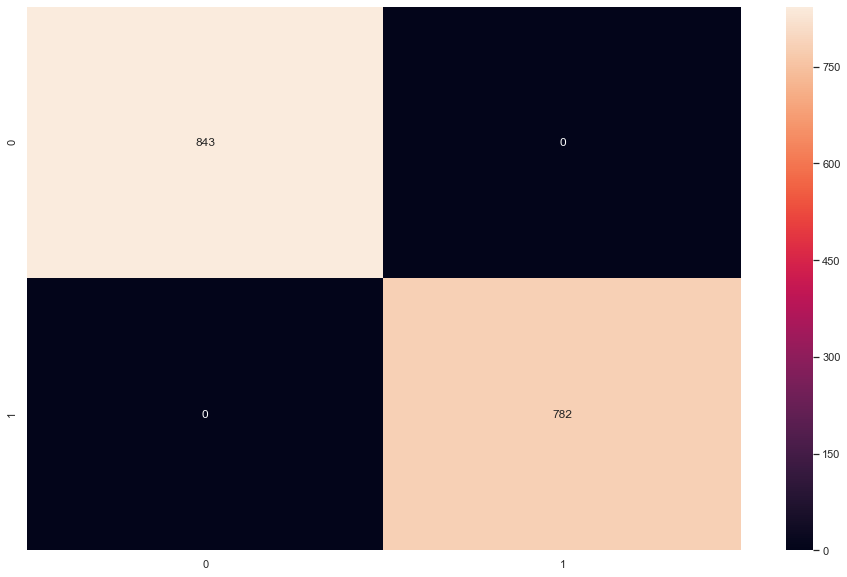

In [25]:
plt.figure(figsize=(16,10))
sns.heatmap(confusion_matrix,annot=True,fmt='.0f')
plt.show()

#### Finding out the roc

In [26]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob_lda)
roc_auc_lda = auc(false_positive_rate, true_positive_rate)
roc_auc_lda

1.0

#### Plotting roc curve

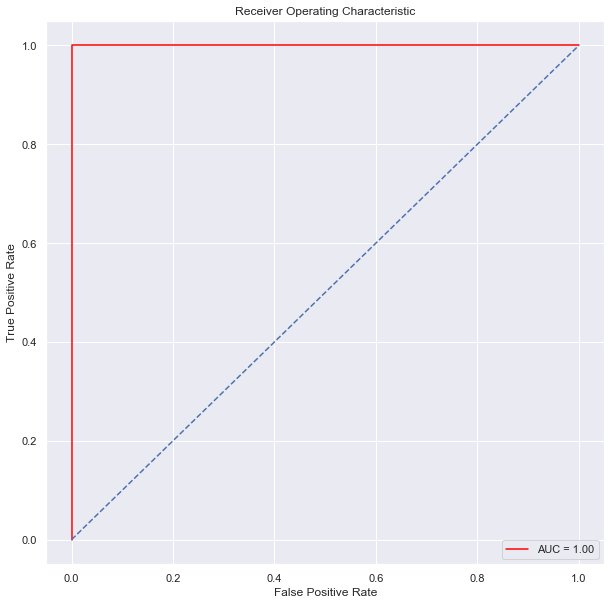

In [27]:
plot_roc(roc_auc_lda)

### QDA

#### Fitting Data

In [28]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train.ravel())

c:\python 3.7\lib\site-packages\sklearn\discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

#### Predicting Probability

In [29]:
y_prob_qda = lda.predict_proba(X_test)[:,1]
y_pred_qda = np.where(y_prob > 0.5, 1, 0)

#### Confusion Matrix

In [30]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred_qda)

confusion_matrix

array([[843,   0],
       [  0, 782]], dtype=int64)

#### Correlation Matrix

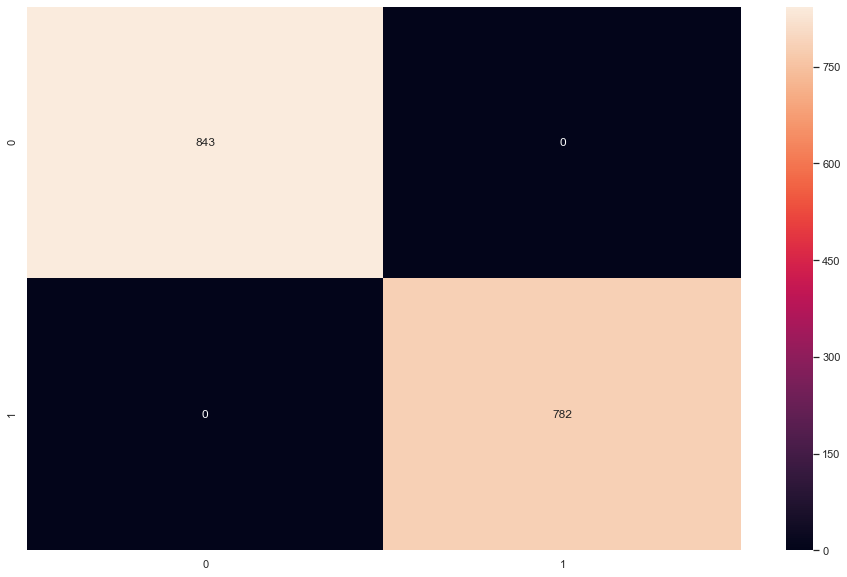

In [31]:
plt.figure(figsize=(16,10))
sns.heatmap(confusion_matrix,annot=True,fmt='.0f')
plt.show()

#### Finding out the roc

In [32]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob_qda)
roc_auc_qda = auc(false_positive_rate, true_positive_rate)
roc_auc_qda

1.0

In [33]:
#### Plotting roc curve

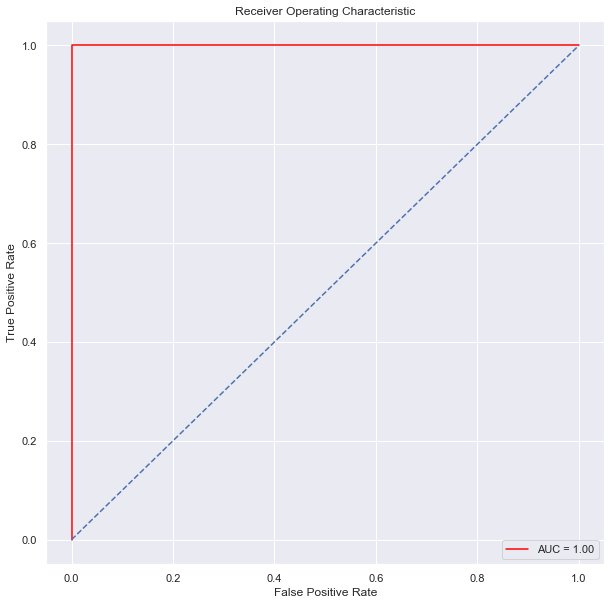

In [34]:
plot_roc(roc_auc_qda)

### Here we have done the analysis with Logistic Regression, LDA and QDA. U can evaluate the dataset with any other algorithm.